In [1]:
# Task 04
# Hand Gesture Recognition


In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
# Define the dataset path
dataset_path = r"dataset/leapGestRecog"

In [ ]:
# Load images and labels
def load_dataset(dataset_path):
    images = []
    labels = []
    
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Dataset path not found: {dataset_path}")

    # First-level directories (00, 01, 02, ...)
    for session_folder in sorted(os.listdir(dataset_path)):   
        session_path = os.path.join(dataset_path, session_folder)
        
        if os.path.isdir(session_path):  
            # Second-level directories (gesture folders)
            for gesture_folder in sorted(os.listdir(session_path)):
                gesture_path = os.path.join(session_path, gesture_folder)
                
                if os.path.isdir(gesture_path):  
                    for image_file in os.listdir(gesture_path):
                        img_path = os.path.join(gesture_path, image_file)
                        try:
                            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
                            if img is None:
                                print(f"Warning: Failed to load {img_path}")
                                continue
                            img = cv2.resize(img, (100, 100))  # Resize to 100x100
                            images.append(img)
                            labels.append(gesture_folder)  # Use gesture folder as label
                        except Exception as e:
                            print(f"Error loading image {img_path}: {e}")

    if not images or not labels:
        raise ValueError("No images found in dataset. Check dataset structure.")
    
    return np.array(images), np.array(labels)

In [5]:
# Load data
X, y = load_dataset(dataset_path)

# Normalize image data
X = X.astype("float32") / 255.0  # Convert to float and normalize
X = X.reshape(-1, 100, 100, 1)  # Add channel dimension

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Print dataset information
print(f"Dataset loaded successfully!")
print(f"Total samples: {len(X)}")
print(f"Image shape: {X.shape}")
print(f"Unique Classes: {len(set(y))}")


Dataset loaded successfully!
Total samples: 20000
Image shape: (20000, 100, 100, 1)
Unique Classes: 10


In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')  # Number of classes
])

C:\Users\Muhammad Haseeb\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 183ms/step - accuracy: 0.7204 - loss: 0.8047 - val_accuracy: 0.9975 - val_loss: 0.0102
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 108s 216ms/step - accuracy: 0.9852 - loss: 0.0483 - val_accuracy: 0.9998 - val_loss: 0.0020
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 166s 264ms/step - accuracy: 0.9929 - loss: 0.0265 - val_accuracy: 0.9998 - val_loss: 8.9289e-04
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 201ms/step - accuracy: 0.9934 - loss: 0.0206 - val_accuracy: 1.0000 - val_loss: 1.6689e-04
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 91s 182ms/step - accuracy: 0.9930 - loss: 0.0176 - val_accuracy: 1.0000 - val_loss: 5.2381e-05
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 182ms/step - accuracy: 0.9968 - loss: 0.0140 - val_accuracy: 1.0000 - val_loss: 3.1180e-04
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 91s 181ms/step - accuracy: 0.9980 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 9.5933e-05
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - ac

In [9]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")
# Save model
model.save("gesture_recognition_model.h5")
# Load model
loaded_model = keras.models.load_model("gesture_recognition_model.h5")
# Predict on test data
predictions = loaded_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)    

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 1.0000 - loss: 4.7441e-04


Test Accuracy: 1.00


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step


In [10]:
# Display some predictions
def display_predictions(X, y_true, y_pred, label_encoder):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X[i].reshape(100, 100), cmap='gray')
        true_label = label_encoder.inverse_transform([y_true[i]])[0]
        pred_label = label_encoder.inverse_transform([y_pred[i]])[0]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.show()

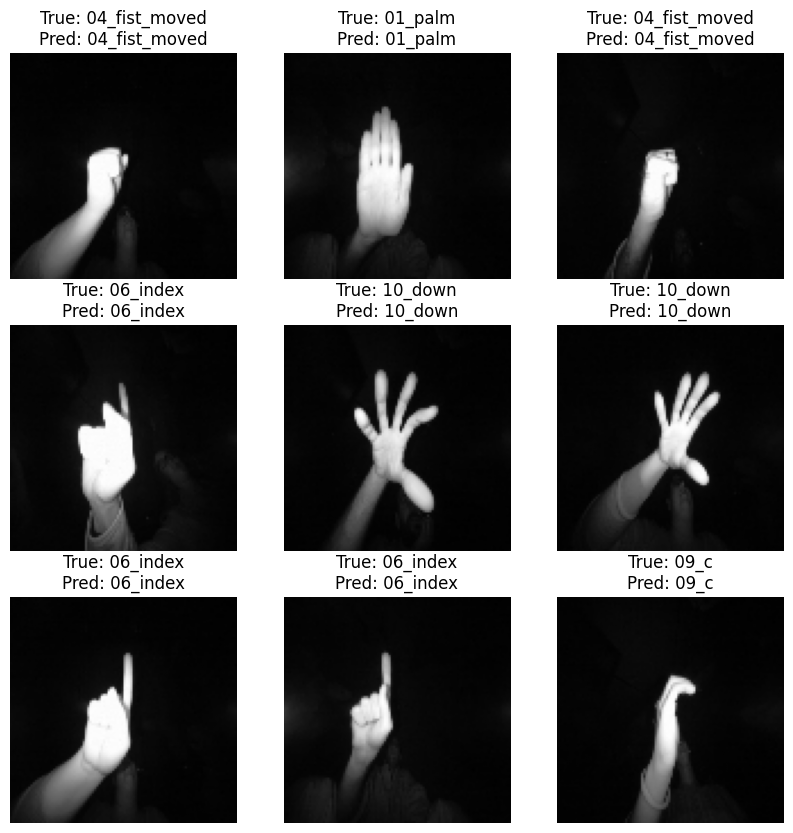

In [11]:
# Display predictions

display_predictions(X_test, y_test, predicted_classes, label_encoder)

# Display training history
def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

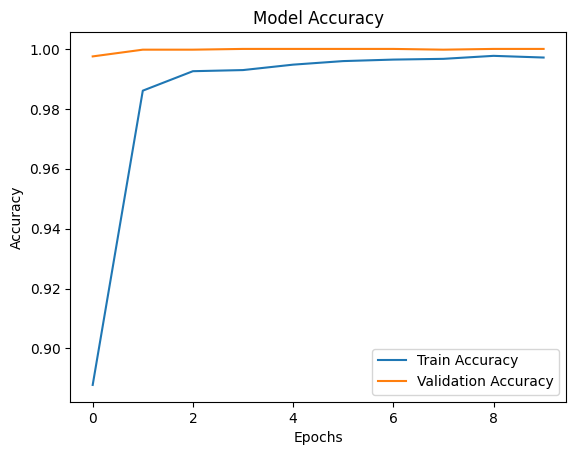

In [12]:
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()